Your boss has heard that electricity prices have become more volatile with extreme prices in 
recent years. Therefore, she has asked you to create a table with some descriptive statistics for 
the hourly electricity price in NO2 and Germany. The table should: - - - 
contain the mean, median, standard deviation, min and max of the hourly electricity 
price in NO2 and Germany separately for each year in the sample (2019, 2020, 2021, 
2022, 2023). 
round all descriptive statistics to two decimals. 
be stored as an excel file called “table_task2.xlsx”. 
What is your conclusion? Have electricity prices in NO2 and Germany become more extreme in 
recent years? Have the prices evolved differently in NO2 than in Germany? 

In [11]:
import pandas as pd
import glob

# Path to the data
DATA_PATH = './data/DayAheadPrices_12.1.D'
pattern = f'{DATA_PATH}/*_DayAheadPrices_12.1.D.csv'

# Reading each file using glob to iterate all the files to match the pattern and appending to the data
data = []
for file in glob.glob(pattern):
    df = pd.read_csv(file, sep='\t', parse_dates=['DateTime'])
    data.append(df)

# Concatenating data into a single DataFrame
df = pd.concat(data, axis=0)

# Filtering for NO2 and Germany with ResolutionCode PT60M
df = df[(df['MapCode'].isin(['NO2', 'DE_LU'])) & (df['ResolutionCode'] == 'PT60M')]

# Extracting the year from DateTime
df['Year'] = df['DateTime'].dt.year

# Grouping by year and MapCode to calculate descriptive statistics
stats = df.groupby(['Year', 'MapCode'])['Price'].agg(['mean', 'median', 'std', 'min', 'max']).reset_index()

# Rounding the statistics to two decimal places
stats = stats.round(2)

# Saving to an Excel file with one sheet
stats.to_excel('table_task2.xlsx', index=False, header=True)

# Display the statistics table
print("Descriptive Statistics:")
print(stats)

Descriptive Statistics:
   Year MapCode    mean  median     std     min     max
0  2019   DE_LU   36.58   37.37   14.25  -90.01   87.12
1  2019     NO2   37.75   38.16    6.22    5.86   84.33
2  2020   DE_LU   30.47   30.99   17.50  -83.94  200.04
3  2020     NO2    9.29    6.95    8.26   -1.73   99.92
4  2021   DE_LU   96.85   75.48   73.68  -69.00  620.00
5  2021     NO2   75.11   59.34   47.22   -1.97  600.16
6  2022   DE_LU  235.44  208.34  142.82  -19.04  871.00
7  2022     NO2  211.28  181.13  125.85    0.04  844.00
8  2023   DE_LU   95.18   98.02   47.58 -500.00  524.27
9  2023     NO2   79.44   80.46   36.28  -61.84  261.85


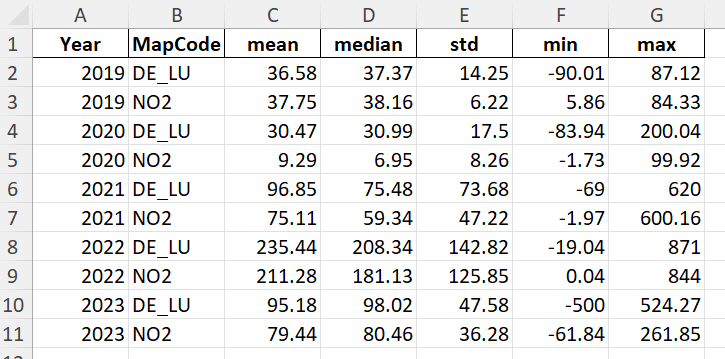

This is how the table looks like in Excel

The prices seem to have become more extreme the last few years. They have become higher as well. The last year, however has shown a break in the trend where the prices are less volatile and also lower than previous years. 